# DiuSST teaser plot
Code to reproduce the teaser image on https://github.com/reykboerner/diusst

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from scipy.ndimage import gaussian_filter1d
from scipy import stats
import xarray as xr

In [2]:
data = xr.load_dataset('../../input_data/moce5/moce5_dataset.cdf', decode_timedelta=False)
_diusst = np.load("../../output_files/simu_diusst.npz")
_zb05 = np.load("../../output_files/simu_zb05.npz")
_slab = np.load("../../output_files/simu_slab.npz")
_const = np.load("../../output_files/simu_const.npz")

_data = {}
for i, container in enumerate([_diusst, _zb05, _slab, _const]):
    _data[i] = [container[key] for key in container]

simu_diusst, simu_zb05, simu_slab, simu_const = [_data[i] for i in range(4)]

T_f = float(data.T_f)
ref_idx = 20
time_pts = data['time_day'].to_numpy()[:-1]

dsst_diusst = simu_diusst[0][:,0] - simu_diusst[0][:,ref_idx]
dsst_zb05 = simu_zb05[0]
dsst_slab = simu_slab[0] - T_f

flux_diusst = simu_diusst[3][0] + simu_diusst[3][1] + simu_diusst[3][2]
flux_zb05 = simu_zb05[2][0] + simu_zb05[2][1] + simu_zb05[2][2]
flux_slab = simu_slab[1][0] + simu_slab[1][1] + simu_slab[1][2]
flux_const = simu_const[1][0] + simu_const[1][1] + simu_const[1][2]

training_int1 = np.arange(96,413,1)
training_int2 = np.arange(1290,1585,1)
training_idx = np.concatenate((training_int1, training_int2))
validation_int1 = np.arange(0,96,1)
validation_int2 = np.arange(413,1290,1)
validation_int3 = np.arange(1585,1851,1)
validation_idx = np.concatenate((np.concatenate((validation_int1, validation_int2)),validation_int3))

model_r = stats.pearsonr(data['dsst'][:-1],dsst_diusst)[0]
zb05_r = stats.pearsonr(data['dsst'][:-1],dsst_zb05)[0]
slab_r = stats.pearsonr(data['dsst'][:-1],dsst_slab)[0]

print('Reference depth: {:.3f} m'.format(simu_diusst[2][ref_idx]))
print(model_r, zb05_r, slab_r)

Reference depth: -3.045 m
0.7352144754256411 0.7185935230743207 0.49579120857635384


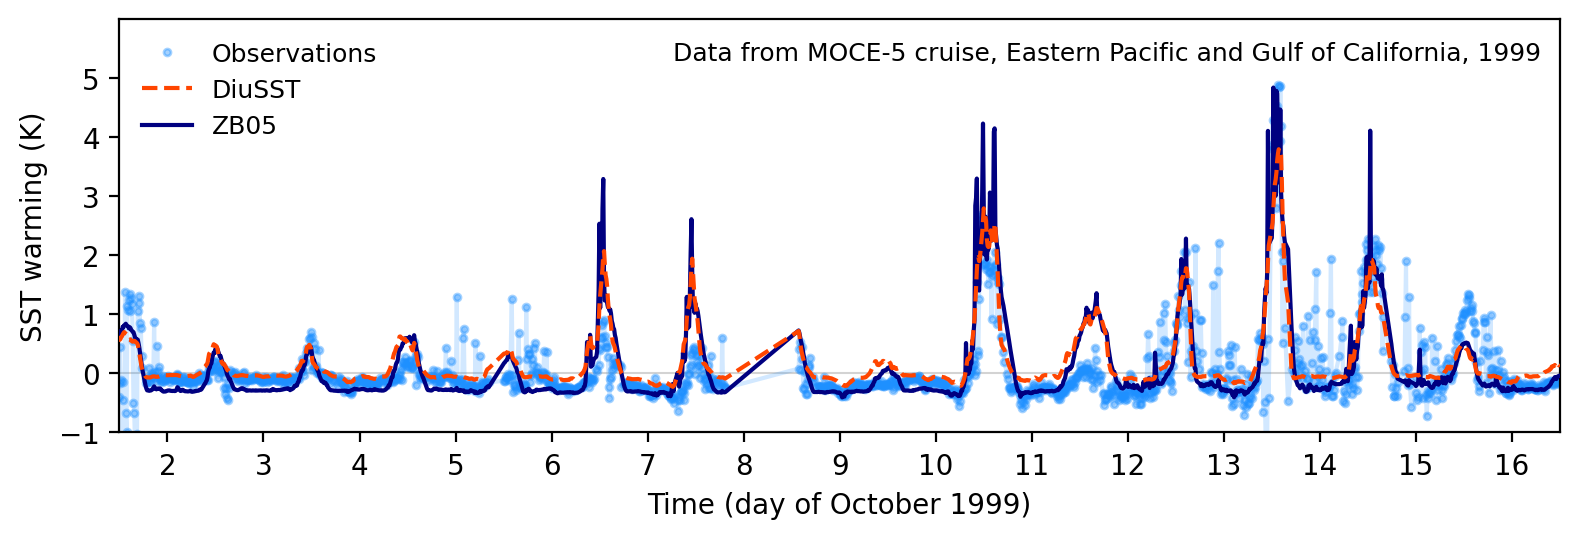

In [3]:
xmin, xmax = -1., 6.

fig, ax = plt.subplots(dpi=200,figsize=(8,2.8))

ax.plot(data['time_day'],data['dsst'],alpha=0.2,c='dodgerblue')
ax.plot(data['time_day'],data['dsst'],'.',markersize=5,alpha=0.4,c='dodgerblue', label='Observations')
ax.plot(time_pts,dsst_diusst,c='orangered', label='DiuSST', ls='--', zorder=9, lw=1.5)
ax.plot(time_pts,dsst_zb05, c='navy', label='ZB05', zorder=8)
#ax.plot(time_pts,dsst_slab, c='orange', label='Slab',zorder=10)
ax.axhline(y=0,c='lightgray',zorder=0,lw=0.75)
ax.legend(frameon=False,loc='upper left', fontsize=9)
ax.set(xlim=(0.5,15.5),xticks=np.arange(1,16),xticklabels=np.arange(15)+2, ylim=(xmin,xmax))#np.arange(0,21)+1)
#ax.set(xlim=(8,15),ylim=(-1,5.5))
ax.set(yticks=[-1,0,1,2,3,4,5])
ax.set(ylabel="SST warming (K)", xlabel="Time (day of October 1999)")
ax.text(15.3,5.63, "Data from MOCE-5 cruise, Eastern Pacific and Gulf of California, 1999", fontsize=9, ha="right", va="top")

fig.align_ylabels()
plt.tight_layout()

#plt.savefig("diusst_teaser.png", bbox_inches="tight")

plt.show()